In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
studreg = pd.read_csv('../data/studentRegistration.csv')
studreg

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [16]:
student_multi_result = studreg.groupby(['id_student'])['code_module'].value_counts().reset_index(name="count")
student_multi_result

,id_student,code_module,count
0,3733,DDD,1
1,6516,AAA,1
2,8462,DDD,2
3,11391,AAA,1
4,23629,BBB,1
...,...,...,...
31279,2698591,BBB,1
31280,2702660,FFF,1
31281,2707979,DDD,1
31282,2710343,DDD,2


In [17]:
student_multi_result.groupby('count').size()

count
1    30013
2     1235
3       34
4        2
dtype: int64

In [23]:
student_multi_result.loc[student_multi_result['count']>1]

,id_student,code_module,count
2,8462,DDD,2
9,24213,DDD,2
16,25629,BBB,2
29,27417,DDD,2
34,27891,BBB,2
...,...,...,...
31234,2691267,CCC,2
31237,2691780,DDD,2
31240,2692101,DDD,2
31269,2697921,FFF,2


In [25]:
student_multi_result['id_student'].loc[student_multi_result['count']>1]

2           8462
9          24213
16         25629
29         27417
34         27891
          ...   
31234    2691267
31237    2691780
31240    2692101
31269    2697921
31282    2710343
Name: id_student, Length: 1271, dtype: int64

In [28]:
studinfo = pd.read_csv('../data/studentInfo.csv')
studinfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [44]:
multistudcources = studinfo[['code_module','id_student','final_result']].loc[studinfo['id_student'].isin(student_multi_result['id_student'].loc[student_multi_result['count']>1])]
multistudcources

,code_module,id_student,final_result
15,AAA,65002,Withdrawn
22,AAA,94961,Withdrawn
41,AAA,129955,Withdrawn
44,AAA,135335,Withdrawn
45,AAA,135400,Withdrawn
...,...,...,...
31964,GGG,600320,Pass
31966,GGG,603585,Fail
31994,GGG,624767,Distinction
32003,GGG,627812,Distinction


In [51]:
pd.options.mode.chained_assignment = None
multistudcources['columns'] = multistudcources.groupby('id_student')['final_result'].cumcount()
multistudcources

,code_module,id_student,final_result,columns
15,AAA,65002,Withdrawn,0
22,AAA,94961,Withdrawn,0
41,AAA,129955,Withdrawn,0
44,AAA,135335,Withdrawn,0
45,AAA,135400,Withdrawn,0
...,...,...,...,...
31964,GGG,600320,Pass,1
31966,GGG,603585,Fail,1
31994,GGG,624767,Distinction,1
32003,GGG,627812,Distinction,1


In [47]:
result = multistudcources[['id_student','final_result','columns']].pivot(index='id_student', columns='columns')
print(result)

           final_result                                
columns               0          1          2    3    4
id_student                                             
8462          Withdrawn  Withdrawn        NaN  NaN  NaN
24213         Withdrawn       Pass        NaN  NaN  NaN
25629         Withdrawn  Withdrawn        NaN  NaN  NaN
27417         Withdrawn  Withdrawn        NaN  NaN  NaN
27891         Withdrawn       Fail        NaN  NaN  NaN
...                 ...        ...        ...  ...  ...
2691267       Withdrawn       Pass        NaN  NaN  NaN
2691780       Withdrawn  Withdrawn  Withdrawn  NaN  NaN
2692101       Withdrawn       Fail        NaN  NaN  NaN
2697921       Withdrawn       Fail       Pass  NaN  NaN
2710343            Fail       Fail        NaN  NaN  NaN

[1259 rows x 5 columns]


In [59]:
multistudcources.groupby(['columns','final_result']).count()

code_module  id_student
columns final_result                         
0       Distinction             3           3
        Fail                  117         117
        Pass                   12          12
        Withdrawn            1127        1127
1       Distinction            38          38
        Fail                  394         394
        Pass                  285         285
        Withdrawn             542         542
2       Distinction            11          11
        Fail                   44          44
        Pass                   94          94
        Withdrawn              81          81
3       Fail                    7           7
        Pass                    9           9
        Withdrawn               8           8
4       Withdrawn               1           1

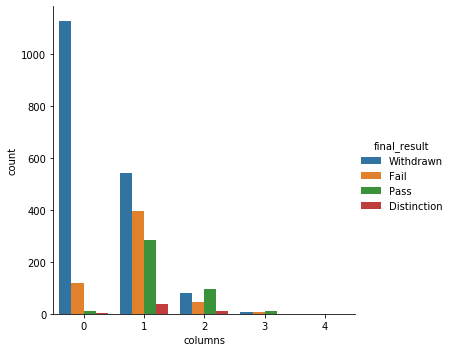

In [58]:
import seaborn as sns
sns.catplot(data=multistudcources,kind='count',x='columns',hue='final_result')